<a href="https://colab.research.google.com/github/yogin16/notebooks/blob/master/motivation-for-machine-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curve Fitting

The goal of this article is to provide a little context on:

- how the modern machine learning algorithms have grown
- why machine learning is a good technique for many different applications and domains
- why machine learning works (e.g., why a machine learns)

For this introduction to machine learning, We will go through a toy example of curve fitting problem. We will first approach this problem using elementary algebra, the “old school” way, then we will solve it using machine learning with two different algorithms.

## Problem

We want to learn a function f(x) which maps the input x to the output y. For simplicity in this example let x,y belong to the set of real number R.

Lets say we are given sample observations as follows:


|x |y = f(x)|
|--|--------|
|1|	21|
|2|	53|
|3|	101|
|4|	165|


---




Our goal is to learn a function that maps points as best as possible. Once we learn this function we would be able to predict ŷ for any new input x.

Learning in this context means:

- to be able to fit the data to find relationships with various inputs
- to be able to predict output for new input value

## Solving with Algebra

Let’s plot the data points we have:

![raw points](https://yogin16.github.io/assets/images/bare-points.png)

When we try to fit these points with a line: we want to know the function that represents a line which would look like this:

![linear](https://yogin16.github.io/assets/images/1st-order-curve.png)

Because these are only 4 data points we get a feeling that the data is linear and we may be able to fit in the first order polynomial. But in fact the data is generated from the second order function. Original points belonged to the equation **y = 8*x^2 + 8*x + 5**

So these would fit nicely when we try to with to second order polynomial:

![2nd order](http://yogin16.github.io/assets/images/2nd-order-curve.png)



In [0]:
"""
The code is implementation of techniques in this lecture: https://www.essie.ufl.edu/~kgurl/Classes/Lect3421/Fall_01/NM5_curve_f01.pdf
"""
import matplotlib.pyplot as plt
import numpy as np

def curve(X, Y, order):
	sigma_x=[]
	for i in range(2*order + 1):
		if i==0:
			ans=len(X)
		else:
			ans=0
			for x in X:
				ans += x ** i
		sigma_x.append(ans)
	print(sigma_x)

	sigma_xy=[]
	for i in range(order + 1):
		ans = 0
		for index in range(len(Y)):
			x = X[index]
			y = Y[index]
			ans += (x ** i)*y
		sigma_xy.append(ans)
	print(sigma_xy)

	A=[]
	for i in range(order + 1):
		A.append(sigma_x[i:(i + order + 1)])

	numA = np.array(A)
	print(numA)
	numB = np.array(sigma_xy)
	coeff = np.dot(np.linalg.inv(numA),numB)
	print(coeff)

	## coeff matrix is our answer - creating sample data to plot the function for the polynomial below:
	sample_x = np.linspace(0,6,20)
	x_arr = []
	for sample in sample_x:
		pol = []
		for i in range(order + 1):
			pol.append(sample ** i)
		x_arr.append(pol)
	numSampleX = np.array(x_arr)
	sample_y = np.dot(numSampleX, coeff)
	print(sample_x)
	print(sample_y)

	plt.plot(sample_x, sample_y)

[4, 2.1403383441885944, 1.5239149401132281]
[49.31402627441457, 32.864538508614174]
[[4.         2.14033834]
 [2.14033834 1.52391494]]
[ 3.17517024 17.10633528]
[0.         0.31578947 0.63157895 0.94736842 1.26315789 1.57894737
 1.89473684 2.21052632 2.52631579 2.84210526 3.15789474 3.47368421
 3.78947368 4.10526316 4.42105263 4.73684211 5.05263158 5.36842105
 5.68421053 6.        ]
[  3.17517024   8.57717085  13.97917147  19.38117208  24.78317269
  30.18517331  35.58717392  40.98917453  46.39117515  51.79317576
  57.19517637  62.59717699  67.9991776   73.40117821  78.80317883
  84.20517944  89.60718005  95.00918067 100.41118128 105.81318189]
[4, 2.1403383441885944, 1.5239149401132281, 1.246440908345673, 1.0884988347203475]
[49.31402627441457, 32.864538508614174, 26.299092645094305]
[[4.         2.14033834 1.52391494]
 [2.14033834 1.52391494 1.24644091]
 [1.52391494 1.24644091 1.08849883]]
[5. 8. 8.]
[0.         0.31578947 0.63157895 0.94736842 1.26315789 1.57894737
 1.89473684 2.21052

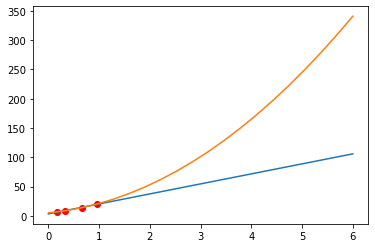

In [0]:
size = 4
def generate_data(size):
  x = np.array(np.random.rand(size,))
  y = 8 * (x**2) + 8*x + 5
  return x,y
    
X,Y = generate_data(size)
	
order=2

plt.plot(X, Y, 'ro')
	
for i in range(1,order+1):	
  curve(X, Y, i)
plt.show()	

## Solving with Gradient Descent Optimizer

Above needed to use Matrix Inervse operation. Which may not be feasible all the time. Plus it a costly operation when we have lot of parameters.

We are going to derive inspiration of error from linear algebra. We want to minimize that error to fit our data points. But we assume that here, we have many data points available for our functions. So imagine that rather having only four points for the (x,y) entry in the table we have say 10k of them from the same function. (This is the case for many real world example for machine learning tasks where we want to learn complex functions but have huge data set backing the mapping). However, we want to avoid matrix inverse operation.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
5000   0.00010633842
10000   7.7350975e-05
15000   4.538573e-06
After 17810 Iterations : 

Equation : 	 y = 7.998422x^2.0002636909484863 + 8.001748085021973x + 4.999871253967285


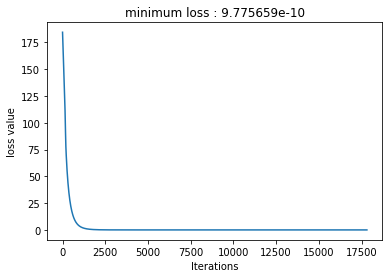

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

size = 10000
def generate_data(size):
    x = np.array(np.random.rand(size,))
    y = 8 * (x**2) + 8*x + 5
    return x,y
    
train_x,train_y = generate_data(size)

x = tf.placeholder(tf.float32,shape=(None,))
y = tf.placeholder(tf.float32,shape=(None,))
    
A = tf.Variable(np.random.normal(),dtype=tf.float32)
B = tf.Variable(np.random.normal(),dtype=tf.float32)
C = tf.Variable(np.random.normal(),dtype=tf.float32)
p1 = tf.Variable(np.random.normal(),dtype=tf.float32)

y_pred = A * x ** p1 + B * x + C
loss = tf.reduce_mean(tf.square((y_pred - y)))
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)
iterations = 0
loss_hist = []
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    loss_val = 1000
    while(loss_val > 0.000000001):
        loss_val,_ = session.run([loss,optimizer],feed_dict={x:train_x,y:train_y})
        iterations = iterations + 1
        if iterations%5000 == 0:
            print(iterations," ",loss_val)
        loss_hist.append(loss_val)
    print("After {} Iterations : \n".format(iterations))
    print("Equation : \t y = {:2f}x^{} + {}x + {}".format(A.eval(),p1.eval(),B.eval(),C.eval()))
    
plt.plot(loss_hist)
plt.xlabel("Iterations")
plt.ylabel("loss value")
plt.title("minimum loss : {}".format(str(min(loss_hist))))
plt.show()

After 17968 Iterations : 

It learns that the equation is:

**y = 7.998426x^2.00026535987854 + 8.001739501953125x + 4.999870777130127**

## Solving with Neural Network

We make improvements to gradient optimization and use neural network, a generic framework build upon combining many neurons, an inspiration from how a human brain might learn anything. Any function we want to learn is the combination of many connected layers (deep) and each layers is set of neurons. That is why this technique is called deep learning. Each neuron has an input and its own parameters governing whether to be active on the input.

Step 1, Loss= 319.3072
Step 10, Loss= 189.3379
Step 20, Loss= 92.5650
Step 30, Loss= 39.2553
Step 40, Loss= 16.8499
Step 50, Loss= 10.0269
Step 60, Loss= 8.0548
Step 70, Loss= 6.7787
Step 80, Loss= 5.6844
Step 90, Loss= 4.9294
Step 100, Loss= 4.4424
Step 110, Loss= 4.0748
Step 120, Loss= 3.7563
Step 130, Loss= 3.4709
Step 140, Loss= 3.2086
Step 150, Loss= 2.9643
Step 160, Loss= 2.7371
Step 170, Loss= 2.5279
Step 180, Loss= 2.3350
Step 190, Loss= 2.1585
Step 200, Loss= 1.9966
Step 210, Loss= 1.8481
Step 220, Loss= 1.7126
Step 230, Loss= 1.5884
Step 240, Loss= 1.4743
Step 250, Loss= 1.3699
Step 260, Loss= 1.2751
Step 270, Loss= 1.1901
Step 280, Loss= 1.1141
Step 290, Loss= 1.0463
Step 300, Loss= 0.9859
Step 310, Loss= 0.9323
Step 320, Loss= 0.8848
Step 330, Loss= 0.8424
Step 340, Loss= 0.8044
Step 350, Loss= 0.7703
Step 360, Loss= 0.7395
Step 370, Loss= 0.7112
Step 380, Loss= 0.6852
Step 390, Loss= 0.6610
Step 400, Loss= 0.6383
Optimization Finished!


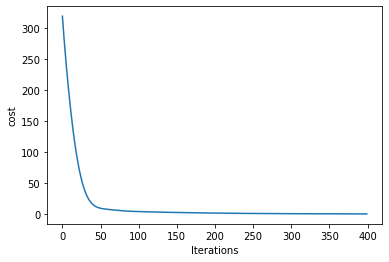

In [0]:
'''
	References used for learning
		https://github.com/aymericdamien/TensorFlow-Examples
		https://datascience.stackexchange.com/questions/20058/tensorflow-regression-using-deep-neural-network
'''

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

size = 1000
def generate_data(size):
    x = np.array(np.random.rand(size,))
    y = 8 * (x**2) + 8*x + 5
    return np.transpose([x]),np.transpose([y])
    
vector_X,vector_Y = generate_data(size)

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 1
num_classes = 1 

# Parameters
learning_rate = 0.0001
num_steps = 400
batch_size = 128
display_step = 10

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
prediction = neural_net(X)

# Define cost and optimizer
loss = tf.reduce_mean(tf.square((prediction - Y)))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

plotValues = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1, num_steps+1):
        loss_val,_ = sess.run([loss, optimizer], feed_dict={X: vector_X,Y: vector_Y})
        plotValues.append(loss_val)
        if step % display_step == 0 or step == 1:
            print("Step " + str(step) + ", Loss= " + "{:.4f}".format(loss_val))
    print("Optimization Finished!")

plt.plot(plotValues)
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.show()

### Benefits of above approach

- Notice here we are not specifying anything about function being polynomial.
- Function is just combination of neuron layers.
- No feature engineering needed because it learns that.
- Non-linearity is added in each neuron computation based on which a neuron decides to activate itself.
- We can model complex functions with as many as millions of parameters to learn by increasing the number of layers and the number of neurons in each layer.